# Project 3: Investigate TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I'll go through the data analysis process to Investigate a dataset and communicate my findings about it using Python libraries NumPy, pandas, and Matplotlib. The dataset I selected for this project is **TMDb Movie Data** which contains information about 10,000 movies collected from The Movie Database (TMDb), including: 
- user ratings
- runtime
- budget
- revenue, and other information.


While investigating and analyzing this dataset, I will be answering the following questions:
- How do the number of movies in each genre change over time?
- Is there a relationship between user average votes and movies revenues?
- What runtime is associated with movies that have high revenues?
- What is the best release (month / week / day of week) that guarantees high movie revenues?

The answers to these four questions could be useful for production companies who are in the process of producing and releasing new movies and want to guarantee high movie revenue.

In [141]:
#import all necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

sns.set_style('darkgrid')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [142]:
#load the dataset and store it in a pandas dataframe
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [143]:
#display basic information about the dataset (total rows, total columns, data types, columns whith missing data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From looking at the result from info() function, we can notice 2 main problems in the dataset which are:
- There are a lot of columns with missing data (imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies) 
- release_date column has incorrect data type

The solutions to these problems:
- Since almost all the columns with null values are of the type object or String, we can not use the result of descriptive statistics to fill them. So the only option is to drop the rows with null values. But before that, it will be better to drop the columns with missing data which are not useful in the analysis (imdb_id, cast, homepage, director, tagline, overview, keywords, production_companies ). this will help in minimizing the rows to be dropped as much as possible. 
- Also, it will be better to drop other columns which will not be used in answering the specified questions -even though they don't contain missing data- in order to simplify the analysis process. These columns are : (popularity, original_title, vote_count). and since budget_adj and revenue_adj show the budget and revenue of the associated movie in terms of 2010 dollars accounting for inflation over time, they will be used in the analysis instead of the regular budget and revenue columns, which mean both of them should also be dropped. 
- convert release_date column from string to date.

In [144]:
#display the descriptive statistics for the numeric columns of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the result of describe() function, we can notice that some columns (budget, revenue, runtime) have the value zero as minimum, median, and 1st quartile. This could not be possible in real life, so these values need to be fixed by filling the rows that have zero with the mean of the dataset. 

In [145]:
#check duplicates 
df.duplicated().sum()

1

There is only one duplicated column that should be dropped.

### Data Cleaning 
### 1. Drop Unneeded Columns

In [146]:
#drop the columns which are not useful in the analysis process and in answering the specified questions
df.drop(['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'overview', 'keywords', 'production_companies', 'vote_count'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 8 columns):
id              10866 non-null int64
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null object
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 679.2+ KB


Now we can see that only **genres** column has missing data and we will be dropping only 23 rows instead of 7930 (since the column with the minimum non-null values was **homepage**, which was having only 2936 non-null values.)

### 2. Drop Rows with Missing Data

In [147]:
#drop rows with null values
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 8 columns):
id              10843 non-null int64
runtime         10843 non-null int64
genres          10843 non-null object
release_date    10843 non-null object
vote_average    10843 non-null float64
release_year    10843 non-null int64
budget_adj      10843 non-null float64
revenue_adj     10843 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 762.4+ KB


Now the dataset doesn't contain rows with missing data. 

### 3. Drop Duplicated Rows

In [148]:
#check diplicates
df.duplicated().sum()

1

Even after dropping many columns and rows from the dataset, we still have the duplicated row and it must be dropped. 

In [149]:
#drop duplicated rows
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

Now there are no duplicated rows in the dataset.

### 4. Fix Incorrect Data Types

In [150]:
# fix data type for release date
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 8 columns):
id              10842 non-null int64
runtime         10842 non-null int64
genres          10842 non-null object
release_date    10842 non-null datetime64[ns]
vote_average    10842 non-null float64
release_year    10842 non-null int64
budget_adj      10842 non-null float64
revenue_adj     10842 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 762.3+ KB


Now all the columns in the dataset have the correct data type

### 5. Fix Columns with 0 Values

Let's display the descriptive statistics again to check if the 0 values problem still exist or not.

In [151]:
#display the descriptive statistics for the numeric columns of the dataset
df.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,102.138443,5.974064,2001.314794,1.758712e+07,5.147797e+07
std,91981.355752,31.294612,0.934257,12.813617,3.433437e+07,1.447723e+08
min,5.000000,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10589.250000,90.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20557.000000,99.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75186.000000,111.000000,6.600000,2011.000000,2.092507e+07,3.387838e+07
max,417859.000000,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The problem still exists and to solve it, replace these zeros with the mean of each column.

In [152]:
#replace the zeros with the mean of runtime
df['runtime'] = df['runtime'].replace(0, df['runtime'].mean())

#replace the zeros with the mean of budget_adj
df['budget_adj'] = df['budget_adj'].replace(0, df['budget_adj'].mean())

#replace the zeros with the mean of revenue_adj
df['revenue_adj'] = df['revenue_adj'].replace(0, df['revenue_adj'].mean())

In [153]:
#display the descriptive statistics for the numeric columns of the dataset
df.describe()

,id,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,65870.675521,102.421062,5.974064,2001.314794,2.679108e+07,7.993283e+07
std,91981.355752,30.828622,0.934257,12.813617,3.053264e+07,1.366907e+08
min,5.000000,2.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10589.250000,90.000000,5.400000,1995.000000,1.758712e+07,5.147797e+07
50%,20557.000000,99.000000,6.000000,2006.000000,1.758712e+07,5.147797e+07
75%,75186.000000,111.000000,6.600000,2011.000000,2.092507e+07,5.147797e+07
max,417859.000000,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

Now that the data is trimmed and cleaned, it is ready to be explored. 

### Explore Individual Variables

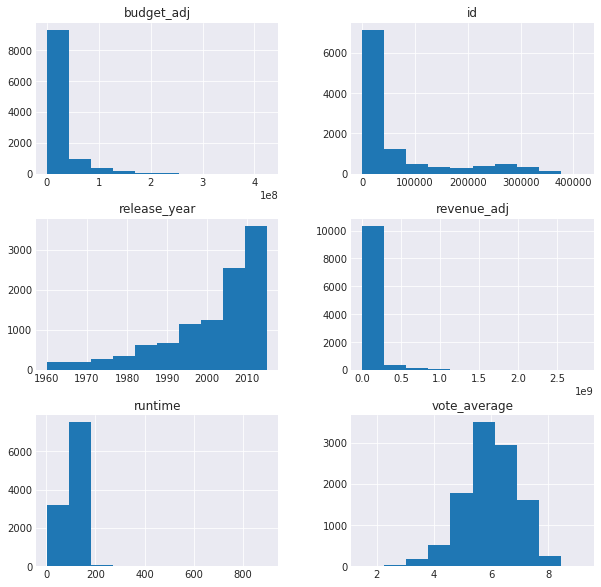

In [154]:
#view histograms for all numerical columns in the dataset
df.hist(figsize= (10,10));

## Q1  How do the number of movies in each genre change over time?

First let's explore the values structure in the **genres** column

In [155]:
df.genres.head(10)

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
5             Western|Drama|Adventure|Thriller
6    Science Fiction|Action|Thriller|Adventure
7              Drama|Adventure|Science Fiction
8            Family|Animation|Adventure|Comedy
9                      Comedy|Animation|Family
Name: genres, dtype: object

It turned out that all entries in the genres column contain multiple values separated by pipe (|) characters. 
So first each value must be stored in a separate column. This will be done using the string split function and storing the result in a new dataframe that will only hold the genres columns. Then merge it to the original dataframe and drop the original genres column

In [156]:
#split genres column by the pipe (|) characters and store the new genres columns in a separate dataframe
genres = df['genres'].str.split('|',expand = True)
genres.head(2)

,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None


In [157]:
#rename the columns of the new genres dataframe 
genres.rename(columns = lambda x: 'genre_'+str(x+1), inplace=True)
genres.head(2)

,genre_1,genre_2,genre_3,genre_4,genre_5
0,Action,Adventure,Science Fiction,Thriller,None
1,Action,Adventure,Science Fiction,Thriller,None


In [158]:
#merge genres dataframe to the original dataframe
df = df.merge(genres, left_index = True , right_index = True)
df.head(2)

,id,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None


In [159]:
#drop the original genres column
df.drop('genres', axis = 1, inplace = True)
df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None


After organizing the genres in separate columns, I'll create a new dataframe with only the release year and genres columns in order to count the number of movies per genre for each year.

In [160]:
#get the loocation of release_year column
year_loc = df.columns.get_loc('release_year')

#get the location of the first genre column
genre_loc = df.columns.get_loc('genre_1')

#create a new dataframe with only the release year and genres columns
genres_df = df.iloc[:,np.r_[year_loc : year_loc + 1, genre_loc : genre_loc + 5]]
genres_df.head(2)

,release_year,genre_1,genre_2,genre_3,genre_4,genre_5
0,2015,Action,Adventure,Science Fiction,Thriller,None
1,2015,Action,Adventure,Science Fiction,Thriller,None


In [161]:
#unpivots the genres dataframe from wide format to long format
genres_df = pd.melt(genres_df, id_vars = ['release_year'], var_name = 'genre_groups', value_name = 'genre')
genres_df.head()

,release_year,genre_groups,genre
0,2015,genre_1,Action
1,2015,genre_1,Action
2,2015,genre_1,Adventure
3,2015,genre_1,Action
4,2015,genre_1,Action


In [162]:
#group the genres by type and count the number of movies in each genres 
genres_df = pd.crosstab([genres_df.release_year, genres_df.genre], genres_df.genre_groups, margins=True)
genres_df.head(10)

genre_groups            genre_1  genre_2  genre_3  genre_4  genre_5  All
release_year genre                                                      
1960         Action           8        0        0        0        0    8
             Adventure        2        3        0        0        0    5
             Comedy           7        0        1        0        0    8
             Crime            1        0        0        1        0    2
             Drama            5        7        1        0        0   13
             Family           0        3        0        0        0    3
             Fantasy          0        1        1        0        0    2
             Foreign          0        0        1        0        0    1
             History          0        1        2        2        0    5
             Horror           6        1        0        0        0    7

Now I'll select three years in different time periods to see how the number of movies is changing among these years. 

First let's display the descriptive statistics for the release year column

In [163]:
#display the descriptive statistics for release_year columns 
df['release_year'].describe()

count    10842.000000
mean      2001.314794
std         12.813617
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

From this result, we can find that the maximum year is 2015 and the median year 2006, almost 10 years differance.
So I decided to select the most recent three years with 10 years differance between them. Which leaves us with 1995, 2005, 2015  

Now I'll create three separate dataframes with the movies count per genre for each one of these three years 

In [164]:
def create_df(year):
    """
    This function creates and returns a dataframe with genres counts for the given year

    """
    
    #to safely disable the SettingWithCopyWarning
    pd.options.mode.chained_assignment = None  
    
    #create a new dataframe with information for the given year
    new_df = genres_df.query('release_year == {}'.format(year))
    
    #remove release_year index and keep the genre names as the only index
    new_df.index = new_df.index.get_level_values('genre')
    
    #drop the individual genre columns counts and keep only the total column
    new_df.drop(['genre_1', 'genre_2', 'genre_3', 'genre_4', 'genre_5'], axis = 1 , inplace = True)
    
    
    #return the created dataframe
    return new_df

In [165]:
#call the helper function to create a dataframe with genres counts for the year 1995
df_year1 = create_df(1995)

#display the dimensions of the dataframe
df_year1.shape

(19, 1)

In [166]:
#call the helper function to create a dataframe with genres counts for the year 2005
df_year2 = create_df(2005)

#display the dimensions of the dataframe
df_year2.shape

(20, 1)

In [167]:
#call the helper function to create a dataframe with genres counts for the year 2015
df_year3 = create_df(2015)

#display the dimensions of the dataframe
df_year3.shape

(19, 1)

By looking at the three new dataframes dimensions we find that the 2005 dataframe has 20 rows while both 1995 and 2015 have 19 rows, which means that there are some genres in 2005 which are not there in 1995 and 2015. To solve this problem I'll merge both of these dataframes with 2005 dataframe separately and create rows for the missed genres with the total 0 for the movies count. The type of merge will be left in order to find the genres in 1995 and 2015 with null values.

But first, we have to understand the structure of the dataframes before and after merging in order to know how to keep their structures consistent.

In [168]:
#display 2005 dataframe
df_year2

genre_groups,All
genre,
Action,70
Adventure,53
Animation,26
Comedy,143
Crime,45
Documentary,17
Drama,182
Family,57
Fantasy,35


In [169]:
#merge 2005 dataframe with 1995 dataframe 
df_year1.merge(df_year3, left_index = True , right_index = True, how = 'left') 

genre_groups,All_x,All_y
genre,,
Action,47,107.0
Adventure,32,69.0
Animation,7,39.0
Comedy,63,162.0
Crime,31,51.0
Documentary,2,57.0
Drama,93,260.0
Family,33,44.0
Fantasy,17,33.0


After looking at both dataframes, here are the steps I came up with to solve the missed genres problem in the following helper function:

In [170]:
def fix_df(defective_df, correct_df):
    """
    This function solves the problem of missed genres in a dataframe
    and returns the corrected version of the dataframe
    """
    
    #merge the two dataframe using left merge and store the result in a temporary dataframe
    temp_df = correct_df.merge(defective_df, left_index = True , right_index = True, how = 'left')
    
    #drop the column which was from the correct dataframe
    temp_df.drop(['All_x'], axis = 1 , inplace = True)
    
    #get the rows of the genres with null values
    temp_df = temp_df[pd.isnull(temp_df['All_y'])]
    
    #filll the nulls with zeros
    temp_df.fillna(0, inplace = True)
    
    #rename the column to have a consistent structure with the defective dataframe
    temp_df.rename(columns = {'All_y':'All'}, inplace = True)
    
    #add the rows of the missed genres to the defective dataframe
    defective_df = defective_df.append(temp_df)
    
    #sort the genres names of the defective dataframe to have consistent structure with the correct dataframe
    defective_df.sort_index(inplace = True)
    
    #return the defective dataframe after correction
    return defective_df

In [171]:
#call the helper function to resolve 1995 dataframe
df_year1 = fix_df(df_year1, df_year2)

#display the dimensions of the dataframe
df_year1.shape

(20, 1)

In [172]:
#call the helper function to resolve 2015 dataframe
df_year3 = fix_df(df_year3, df_year2)

#display the dimensions of the dataframe
df_year3.shape

(20, 1)

Now all of the three dataframes have movies counts for the same number of genres.

Before moving on and creating the visualization let's check the total number of movies in each year

In [173]:
df_year1.sum()

genre_groups
All    480.0
dtype: float64

In [174]:
df_year2.sum()

genre_groups
All    935
dtype: int64

In [175]:
df_year3.sum()

genre_groups
All    1386.0
dtype: float64

Since there is a significant variation in the number of movies of each year, it would be better to use the proportions of the movies in each genre to the total number of movies instead of using the actual movies counts.

In [176]:
#get the total number of movies in each year
year1_total = float(df_year1.sum())
year2_total = float(df_year2.sum())
year3_total = float(df_year3.sum())

#get the proportions of each movie genres
year1_proportions = df_year1['All'] / year1_total
year2_proportions = df_year2['All'] / year2_total
year3_proportions = df_year3['All'] / year3_total

No we can create the visualization (bar chart) for answering the first question.  

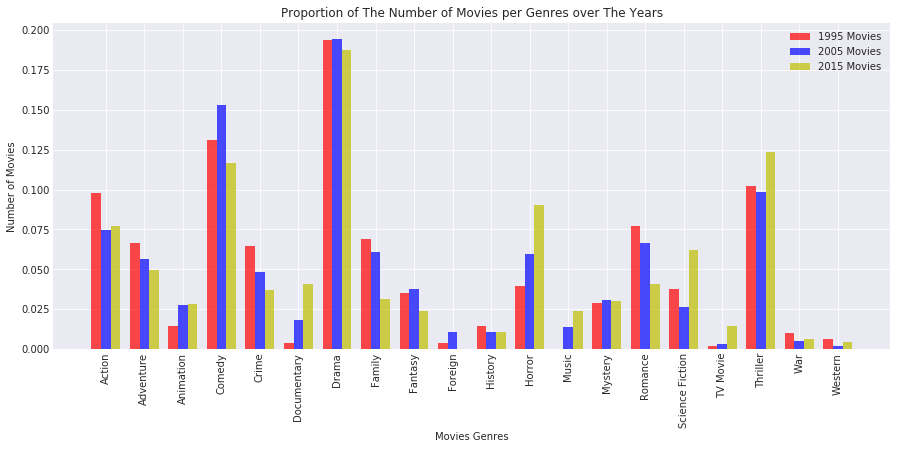

In [177]:
#the x locations for the groups
ind = np.arange(len(year1_proportions))  
#width of the bars
width = 0.25  

#set the plot size
plt.figure(figsize = (15,6))

#create the plot bars
bars_year1 = plt.bar(ind, year1_proportions, width, color='r', alpha=.7, label='1995 Movies')
bars_year2 = plt.bar(ind + width, year2_proportions, width, color='b', alpha=.7, label='2005 Movies')
bars_year3 = plt.bar(ind + width*2, year3_proportions, width, color='y', alpha=.7, label='2015 Movies')

#set the plot title and labels
plt.ylabel('Number of Movies')
plt.xlabel('Movies Genres')
plt.title('Proportion of The Number of Movies per Genres over The Years')

#xtick locations
locations = ind + width  
#xtick labels
labels = df_year1.index
#rotate the xtickes
plt.xticks(rotation=90)
#set the xticks
plt.xticks(locations, labels)

#set the plot legend
plt.legend();

From the bar chart, we can find that the proportion of producing Animation, Documentary, Horror, Music, Science Fiction, Thriller, and TV movies is increasing. While the proportion of producing Action, Adventure, Comedy, Crime, Family, Fantasy, History, Romance, war and western movies is decreasing. 
As for Drama and Mystery movies, the proportion of their production is almost consistent. 

But if we look at the totals of each genre in general we can find that Drama movies productions are the highest followed by Comedy and Thriller, then Action and so on.

Movies production companies must take into consideration these two factors (the proportion of movies in each genre, and how this proportion changes over the time) when selecting the genre of the next movie to be produced in order to be aware of the competition nature in the selected the genre. 

The next three questions are all associated with the independent variable (revenue)

## Q2 Is there a relationship between user average votes and movies revenue?

To answer this question, we will try to find the relation between the revenue (independent variable) and the user average votes (dependent variable).

First let's view the information about the 5 number summary (min, 25%, 50%, 75%, max) for vote_average column and use them to create bin edges that will be used to "cut" the data into groups

In [178]:
#display the descriptive statistics for vote_average column 
df.describe()['vote_average']

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [179]:
#the bin edges that will be used to "cut" the data into groups
votes_bin_edges = [1.5, 5.4, 6.0, 6.6, 9.2]

#the labels for the vote average groups
votes_bin_names = ['1.5 to 5.4', '5.4 to 6.0', '6.0 to 6.6', '6.6 to 9.2'] 

#create vote_avg_group column
df['vote_avg_group'] = pd.cut(df['vote_average'], votes_bin_edges, labels = votes_bin_names)

df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2


In [180]:
#check the total number of movies in each group
df.groupby('vote_avg_group').count()['id']

vote_avg_group
1.5 to 5.4    2882
5.4 to 6.0    2658
6.0 to 6.6    2734
6.6 to 9.2    2566
Name: id, dtype: int64

Since the total number of movies in each group is almost the same, there is no nead to calculate the proportions. So we can go ahead and store the mean of the revenue_adj of each group in a new dataframe and use it to create the plot. 

In [181]:
#create a new dataframe with the mean of the revenue_adj of each group
votes_avg = df.groupby('vote_avg_group').revenue_adj.sum()
votes_avg

vote_avg_group
1.5 to 5.4    1.476523e+11
5.4 to 6.0    1.864070e+11
6.0 to 6.6    2.410275e+11
6.6 to 9.2    2.914419e+11
Name: revenue_adj, dtype: float64

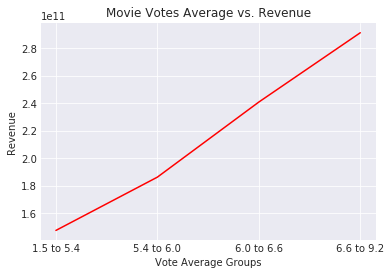

In [182]:
#the x locations
votes_avg_ind = np.arange(len(votes_avg))  

#create the plot
plt.plot(votes_avg_ind, votes_avg, color='r')

#set the plot title and labels
plt.ylabel('Revenue')
plt.xlabel('Vote Average Groups')
plt.title('Movie Votes Average vs. Revenue')
 
#set the xtickes    
plt.xticks(votes_avg_ind, votes_bin_names);

From the line chart, we can find that there is a strong relastionship between user average votes and movies revenue in which higher average votes leads to higher revenue.

So,movies production companies must consider this factor and foxus on producing movies that will guarantee high average votes in order to maximize their revenue 

## Q3 What runtime is associated with movies that have high revenue?

To answer this question, we will try to find the relation between the revenue (independent variable) and the movie's runtime (dependant variable).

First let's view the information about the 5 number summary (min, 25%, 50%, 75%, max) for runtime column and use them to create bin edges that will be used to "cut" the data into groups

In [183]:
#display the descriptive statistics for runtime column 
df.describe()['runtime']

count    10842.000000
mean       102.421062
std         30.828622
min          2.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [184]:
#the bin edges that will be used to "cut" the data into groups
runtime_bin_edges = np.arange(0,901,120)

#the labels for the runtime groups
runtime_bin_names = ['Less than 2 hrs', '2 to 4 hrs', '4 to 6 hrs', '6 to 8 hrs', '8 to 10 hrs', '10 to 12 hrs', 'More than 12 hrs'] 

#create runtime_group column
df['runtime_group'] = pd.cut(df['runtime'], runtime_bin_edges, labels = runtime_bin_names)

df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group,runtime_group
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6,2 to 4 hrs
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2,Less than 2 hrs


In [185]:
#check the total number of movies in each group
df.groupby('runtime_group').count()['id']

runtime_group
Less than 2 hrs     9264
2 to 4 hrs          1536
4 to 6 hrs            25
6 to 8 hrs             8
8 to 10 hrs            6
10 to 12 hrs           1
More than 12 hrs       0
Name: id, dtype: int64

There is a significant variation in the number of movies of each runtime group, and there are only few number of movies in the runtime groups greater than 4 hours compared to the groups with runtime less than 4 hours. So I'll only focus on the movies with runrime equal to 4 hours or less.   

In [186]:
#the bin edges that will be used to "cut" the data into groups
runtime_bin_edges = np.arange(0,241,30)

#the labels for the runtime groups
runtime_bin_names = ['Less than 30 min', '30 to 60 min', '1 to 1.5 hrs', '1.5 to 2 hrs', '2 to 2.5 hrs', '2.5 to 3 hrs', '3 to 3.5 hrs', '3.5 to 4 hrs'] 

#create runtime_group column
df['runtime_group'] = pd.cut(df['runtime'], runtime_bin_edges, labels = runtime_bin_names)

df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group,runtime_group
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6,2 to 2.5 hrs
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2,1.5 to 2 hrs


In [187]:
#check the total number of movies in each group
df.groupby('runtime_group').count()['id']

runtime_group
Less than 30 min     205
30 to 60 min          98
1 to 1.5 hrs        2614
1.5 to 2 hrs        6347
2 to 2.5 hrs        1236
2.5 to 3 hrs         215
3 to 3.5 hrs          65
3.5 to 4 hrs          20
Name: id, dtype: int64

Well, still There is a significant variation in the number of movies of each runtime group, so I will extract the top 20 revenue-earning movies of each runtime group and store and store the mean of the revenue_adj of each group in a new dataframe and use it to create the plot. (I only select the top 20 since it is the minimum total number of movies in the runtime groups). 

In [188]:
#get the minimum total number of movies in the runtime groups
min_runtime_count = df.groupby('runtime_group').count()['id'].min()

#create a new dataframe with the mean of the revenue_adj of the top 20 revenue-earning movies in each runtime group
top_revenue_runtime = df.groupby('runtime_group')['revenue_adj'].nlargest(min_runtime_count).mean(level=0)

top_revenue_runtime

runtime_group
Less than 30 min    5.147797e+07
30 to 60 min        5.401724e+07
1 to 1.5 hrs        6.802327e+08
1.5 to 2 hrs        9.972940e+08
2 to 2.5 hrs        1.413076e+09
2.5 to 3 hrs        1.077488e+09
3 to 3.5 hrs        4.641501e+08
3.5 to 4 hrs        6.829722e+07
Name: revenue_adj, dtype: float64

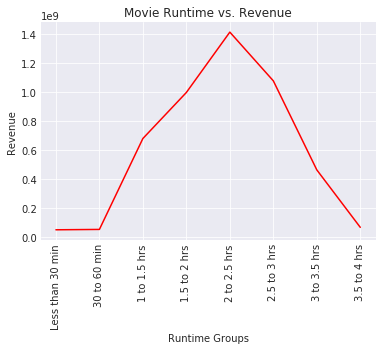

In [189]:
#the x locations
runtime_ind = np.arange(len(top_revenue_runtime)) 

#create the plot
plt.plot(runtime_ind, top_revenue_runtime, color='r')

#set the plot title and labels
plt.ylabel('Revenue')
plt.xlabel('Runtime Groups')
plt.title('Movie Runtime vs. Revenue')
 
#set the xtickes    
plt.xticks(runtime_ind, runtime_bin_names)
#rotate the xtickes
plt.xticks(rotation=90);

From the line chart, we can find that movies with runtime between 2 to 2 and a half hours are mostly associated with higher revenue. And movies with runtime bellow 1 hour and above 3 and half hours are most likely to have the lowest amount of revenue. 

So, this should give a clear idea to the production companies about the best and worst movie's runtime, and what is the perfect runtime that will maximize their revenue.

## Q4 What is the best release (month / week / day of week) that guarantees high movie revenue?

To answer this question, we will try to find the relation between the revenue (independent variable) and the movie's release month/ week /day of week (dependant variable).

We can define the best release month as the month that has the highest average revenue over all the previous years. The same thing goes for the best release week or day of the week.     

To find the release (month / week / day of week) which are associated with high revenue, we first have to extract these values from the release date of each movie.  

In [190]:
#create a new column with the release month
df['release_month'] = pd.DatetimeIndex(df['release_date']).month
df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group,runtime_group,release_month
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6,2 to 2.5 hrs,6
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2,1.5 to 2 hrs,5


In [191]:
#create a new column with the release day of the month
df['release_day'] = pd.DatetimeIndex(df['release_date']).day
df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group,runtime_group,release_month,release_day
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6,2 to 2.5 hrs,6,9
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2,1.5 to 2 hrs,5,13


In [192]:
#create a new column with the release day of the week 
df['day_of_week'] = df['release_date'].dt.weekday_name
df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group,runtime_group,release_month,release_day,day_of_week
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6,2 to 2.5 hrs,6,9,Tuesday
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2,1.5 to 2 hrs,5,13,Wednesday


In [193]:
#the bin edges that will be used to "cut" the release date into 4 groups representing a month's weeks 
week_bin_edges = np.arange(1,32,7)

#the labels for the weeks groups
week_bin_names = ['1st week', '2nd week','3rd week', '4th week' ] 

#create a new column with the release week
df['release_week'] = pd.cut(df['release_day'], week_bin_edges, labels = week_bin_names)

df.head(2)

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group,runtime_group,release_month,release_day,day_of_week,release_week
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6,2 to 2.5 hrs,6,9,Tuesday,2nd week
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2,1.5 to 2 hrs,5,13,Wednesday,2nd week


After creating the necessary columns, now we can start the analysis to answer the question.

### 1. The best release month:

Let's first check the total number of movies released in each month

In [194]:
#check the total number of movies in each month
df.groupby('release_month').count()['id']

release_month
1      916
2      687
3      821
4      797
5      808
6      826
7      798
8      916
9     1330
10    1148
11     814
12     981
Name: id, dtype: int64

Since there is a variation in the total number of movies released in each month, I will extract the top revenue-earning movies of each month and store the mean of the revenue_adj of each month in a new dataframe and use it to create the plot instead of using the overall totals. (the number of top revenue-earning movies to be selected will be based on the minimum total number of movies among all the  months).

In [195]:
#get the minimum total number of movies among all the months
min_month_count = df.groupby('release_month').count()['id'].min()

#create a new dataframe with the mean of the revenue_adj of the top revenue-earning movies in each month
top_revenue_month = df.groupby('release_month')['revenue_adj'].nlargest(min_month_count).mean(level=0)

top_revenue_month

release_month
1     6.546677e+07
2     6.141240e+07
3     9.111294e+07
4     7.912625e+07
5     1.219961e+08
6     1.457623e+08
7     1.147895e+08
8     7.895474e+07
9     7.610091e+07
10    8.752902e+07
11    1.167415e+08
12    1.439473e+08
Name: revenue_adj, dtype: float64

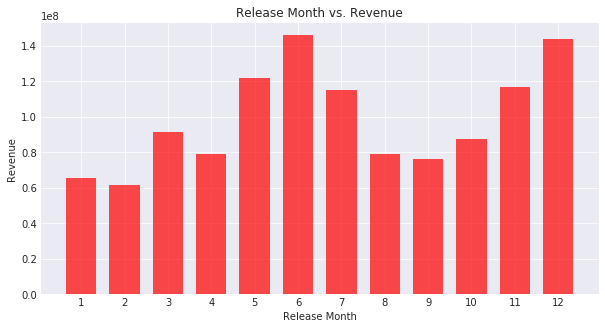

In [196]:
#the x locations for the bars
month_ind = np.arange(len(top_revenue_month))
#the width of the bars
width = 0.70

#specify the plot size
plt.figure(figsize = (10,5))
#create the plot bars
plt.bar(month_ind, top_revenue_month, width, color='r', alpha=.7)

#set the plot title and labels
plt.ylabel('Revenue')
plt.xlabel('Release Month')
plt.title('Release Month vs. Revenue')

#set the xtickes    
plt.xticks(month_ind, top_revenue_month.index); 

From the bar chart, we can find that both June and December are associated with high revenue, so they could be considered as the best months to release a new movie. 

### 2. The best week of the month:

Let's first check the total number of movies released in each week of a month

In [197]:
#check the total number of movies in each week of a month
df.groupby('release_week').count()['id']

release_week
1st week    2271
2nd week    2701
3rd week    2538
4th week    2176
Name: id, dtype: int64

Since there is only a slight difference in the total number of movies released each week, we can directly go ahead and store the mean of the revenue_adj of each week in a new dataframe and use it to create the plot.

In [198]:
#create a new dataframe with the mean of the revenue_adj of each week
release_week = df.groupby('release_week').revenue_adj.mean()
release_week

release_week
1st week    7.475679e+07
2nd week    7.980222e+07
3rd week    8.518280e+07
4th week    8.289580e+07
Name: revenue_adj, dtype: float64

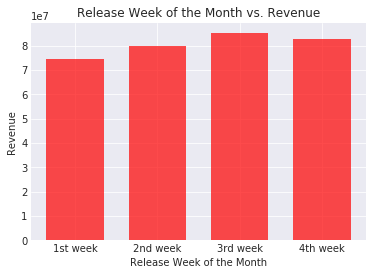

In [199]:
#the x locations for the bars
week_ind = np.arange(len(release_week)) 
#the width of the bars
width = 0.70

#create the plot bars
plt.bar(week_ind, release_week, width, color='r', alpha=.7)

#set the plot title and labels
plt.ylabel('Revenue')
plt.xlabel('Release Week of the Month')
plt.title('Release Week of the Month vs. Revenue')

#set the xtickes    
plt.xticks(week_ind, week_bin_names); 

By looking at the bar chart we can find that all release weeks are associated with high average revenue, but releasing a movie in the second half of a month in general, and the third week of a month, in particular, will guarantee higher revenue.

### 3. The best day of the week:

Let's first check the total number of movies released in each day of the week

In [200]:
#check the total number of movies in each day of the week
df.groupby('day_of_week').count()['id']

day_of_week
Friday       4264
Monday        672
Saturday      790
Sunday        700
Thursday     1691
Tuesday      1188
Wednesday    1537
Name: id, dtype: int64

Since there is a variation in the total number of movies released in each day of the week, I will extract the top revenue-earning movies of each day of the week and store the mean of the revenue_adj of each group in a new dataframe and use it to create the plot. (the number of top revenue-earning movies to be selected will be based on the minimum total number of movies among all the days of the week).

In [201]:
#get the minimum total number of movies among all the days of the week
min_day_count = df.groupby('day_of_week').count()['id'].min()

#create a new dataframe with the mean of the revenue_adj of the top revenue-earning movies in each day of the week
top_revenue_day = df.groupby('day_of_week')['revenue_adj'].nlargest(min_day_count).mean(level=0)

top_revenue_day

day_of_week
Friday       2.041493e+08
Monday       8.247871e+07
Saturday     6.953836e+07
Sunday       7.227337e+07
Thursday     1.761950e+08
Tuesday      1.302338e+08
Wednesday    2.050907e+08
Name: revenue_adj, dtype: float64

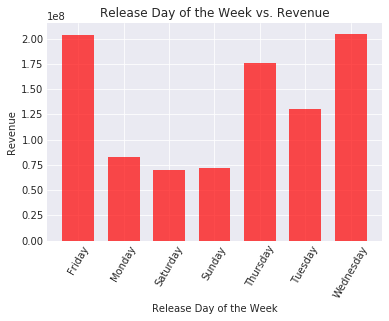

In [202]:
#the x locations for the bars
day_ind = np.arange(len(top_revenue_day)) 
#the width of the bars
width = 0.70

#create the plot bars
plt.bar(day_ind, top_revenue_day, width, color='r', alpha=.7)

#set the plot title and labels
plt.ylabel('Revenue')
plt.xlabel('Release Day of the Week')
plt.title('Release Day of the Week vs. Revenue')

#set the xtickes    
plt.xticks(day_ind, top_revenue_day.index)
#rotate the xtickes
plt.xticks(rotation=60);

By looking at the bar chart, we can find that both Friday and Wednesday are associated with high revenue, so they could be considered as the best days of the week to release a new movie.

From these three charts we can conclude that if a production company wants to maximize its revenue as much as possible it must release any new movie in a Friday or Wednesday of the third week of June or December, and this answers the question of what is the best (month / week / day of week) to release a new movie.

In [203]:
df.head()

,id,runtime,release_date,vote_average,release_year,budget_adj,revenue_adj,genre_1,genre_2,genre_3,genre_4,genre_5,vote_avg_group,runtime_group,release_month,release_day,day_of_week,release_week
0,135397,124.0,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None,6.0 to 6.6,2 to 2.5 hrs,6,9,Tuesday,2nd week
1,76341,120.0,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None,6.6 to 9.2,1.5 to 2 hrs,5,13,Wednesday,2nd week
2,262500,119.0,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None,6.0 to 6.6,1.5 to 2 hrs,3,18,Wednesday,3rd week
3,140607,136.0,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None,6.6 to 9.2,2 to 2.5 hrs,12,15,Tuesday,2nd week
4,168259,137.0,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None,6.6 to 9.2,2 to 2.5 hrs,4,1,Wednesday,NaN


<a id='conclusions'></a>
## Conclusions

To summarize the findings that I got throughout this analysis, I can say that in the process of producing and releasing a new movie, production companies must take into consideration four main factors :
1. **Movie's Runtime:** Producing a movie with runtime between 2 to 2 and a half hours will likely maximize the revenue to the highest possible amount, while a runtime bellow 1 hour or above 3 and half hours will bring the lowest revenue. 


2. **User Average Votes:** There is a strong relationship between user average votes and movies revenue in which higher average votes leads to higher revenue. So, the production companies must focus on meeting the users expectations to guarantee high average votes in order to maximize their revenue


3. **Release Date:** The date in which a movie is released in could strongly affect the revenue, and from the analysis we can conclude that June and December are considered the best months for releasing a movie that guarantees the highest revenue, and the third week of a month and both Friday and Wednesday are considered the best week of the month and day of the week respectively. So if a production company wants to maximize its revenue as much as possible, it must select the release date wisely. 


4. **Competition Nature in The Produced Movie Genre:** The proportion of producing Animation, Documentary, Horror, Music, Science Fiction, Thriller, and TV movies is increasing over the years, while the proportion of producing Action, Adventure, Comedy, Crime, Family, Fantasy, History, Romance, war and western movies is decreasing. And the proportions of Drama and Mystery movies are almost consistent. In addition to the fact that Drama movies productions are the highest over the years followed by Comedy and Thriller, then Action and the rest of the genres. So, when selecting the genre of the next movie to be produced, a production company must be aware of the competition nature in the selected genre. 

#### Notes regarding the limitations of the exploration:

There is a kind of significant variation in the 5 number summary values for some of the dataset's columns, which may be caused due to some outlier values. And this may have affected the results of my explorations. 
Also, replacing the 0 values in budget_adj, revenue_adj and runtime columns with the means may not be the best and most accurate approach to solve the problem.

In [207]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Refrences
1. https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column/25146337#25146337
2. https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
3. https://apassionatechie.wordpress.com/2018/02/24/how-do-i-split-a-string-into-several-columns-in-a-dataframe-with-pandas-python/
4. http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html
6. https://carlyhochreiter.files.wordpress.com/2018/05/investigating-movie-dataset.pdf
7. https://www.geeksforgeeks.org/python-pandas-melt/
8. https://www.youtube.com/watch?v=oY62o-tBHF4
9. http://pbpython.com/pandas-crosstab.html
10. https://stackoverflow.com/questions/26921651/how-to-delete-the-last-row-of-data-of-a-pandas-dataframe
11. https://stackoverflow.com/questions/13021654/get-column-index-from-column-name-in-python-pandas
12. https://stackoverflow.com/questions/40698043/slicing-multiple-ranges-of-columns-in-pandas-by-list-of-names 
13. https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib
14. https://stackoverflow.com/questions/28140771/select-only-one-index-of-multiindex-dataframe
15. https://stackoverflow.com/questions/25430995/keeping-nan-values-and-dropping-nonmissing-values
16. https://cmdlinetips.com/2018/02/how-to-sort-pandas-dataframe-by-columns-and-row/
17. https://stackoverflow.com/questions/10998621/rotate-axis-text-in-python-matplotlib
18. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
19. https://stackoverflow.com/questions/40390634/pandas-groupby-nlargest-sum